# Исследование данных стартапа, который продаёт продукты питания

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

### Описание данных

Каждая запись в логе — это действие пользователя, или событие. 
 - `EventName` — название события;
 - `DeviceIDHash` — уникальный идентификатор пользователя;
 - `EventTimestamp` — время события;
 - `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.
 
### Инструкция по выполнению проекта

#### Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: `/datasets/logs_exp.csv`. Скачать датасет

#### Шаг 2. Подготовьте данные

 - Замените названия столбцов на удобные для вас;
 - Проверьте пропуски и типы данных. Откорректируйте, если нужно;
 - Добавьте столбец даты и времени, а также отдельный столбец дат;

#### Шаг 3. Изучите и проверьте данные

 - Сколько всего событий в логе?
 - Сколько всего пользователей в логе?
 - Сколько в среднем событий приходится на пользователя?
 - Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
 - Много ли событий и пользователей вы потеряли, отбросив старые данные?
 - Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

#### Шаг 4. Изучите воронку событий

 - Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
 - Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
 - Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
 - По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
 - На каком шаге теряете больше всего пользователей?
 - Какая доля пользователей доходит от первого события до оплаты?

#### Шаг 5. Изучите результаты эксперимента

 - Сколько пользователей в каждой экспериментальной группе?
 - Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
 - Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
 - Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
 - Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

#### Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: `/datasets/logs_exp.csv`. Скачать датасет

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import math as mth

In [2]:
logs_exp = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
display(logs_exp.head())

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


#### Шаг 2. Подготовьте данные

Замените названия столбцов на удобные для вас.

In [3]:
logs_exp = logs_exp.rename(columns={'EventName': 'event_name', 'DeviceIDHash': 'device_id', 'EventTimestamp': 'datetime', 'ExpId': 'numb_exp'})
display(logs_exp.head())

,event_name,device_id,datetime,numb_exp
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Проверьте пропуски и типы данных. Откорректируйте, если нужно.

In [4]:
logs_exp.info() # Проверяем тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   device_id   244126 non-null  int64 
 2   datetime    244126 non-null  int64 
 3   numb_exp    244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
logs_exp['datetime'] = pd.to_datetime(logs_exp['datetime'], unit='s') # Меняем тип данных
logs_exp['device_id'] = logs_exp['device_id'].astype(str)
logs_exp['numb_exp'] = logs_exp['numb_exp'].astype(str)

In [6]:
display(logs_exp.isna().sum()) # Проверяем наличие пропусков

event_name    0
device_id     0
datetime      0
numb_exp      0
dtype: int64

In [7]:
logs_exp.duplicated().sum() # Проверяем наличие дубликатов

413

In [8]:
logs_exp = logs_exp.drop_duplicates() # Удаляем дубликаты
logs_exp.duplicated().sum()

0

Добавьте столбец даты и времени, а также отдельный столбец дат.

In [9]:
logs_exp['date'] = logs_exp['datetime'].dt.date # Добавляем столбец с датами
logs_exp['date'] = pd.to_datetime(logs_exp['date'])
display(logs_exp.head())

,event_name,device_id,datetime,numb_exp,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [10]:
# Проверка, что пользователи не попали сразу в несколько групп
user_groups_count = logs_exp.groupby('device_id')['numb_exp'].nunique()

if (user_groups_count > 1).any():
    print("Обнаружены пользователи, попавшие в несколько групп.")
else:
    print("Нет пользователей, попавших в несколько групп.")

Нет пользователей, попавших в несколько групп.


На начальном этапе исследования имелся датафрейм с 244 126 строк. Были заменены названия столбцов на более удобные. Заменены типы данных в некоторых столбцах на корректные. Пропусков не было. Но были дубликаты. Они были удалены. Был добавлен отдельный столбец с датами. Также была проведена проверка на наличие пользователей, которые могли попасть в несколько групп. Таких пользователей не обнаружено.

#### Шаг 3. Изучите и проверьте данные

Сколько всего событий в логе?

In [11]:
print(f'В логе {len(logs_exp)} событий.')

В логе 243713 событий.


Сколько всего пользователей в логе?

In [12]:
count_users = logs_exp['device_id'].nunique()
print(f'В логе {count_users} пользователей.')

В логе 7551 пользователей.


Сколько в среднем событий приходится на пользователя?

In [13]:
avg_event = round(logs_exp.groupby('device_id')['event_name'].count().mean())
print(f'В среднем на пользователя приходятся {avg_event} события.')

В среднем на пользователя приходятся 32 события.


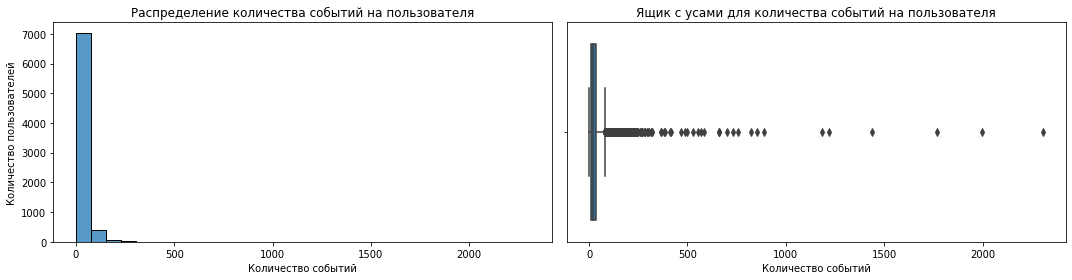

In [14]:
# Гистограмма количества событий на пользователя
plt.figure(figsize=(15, 4))

# Первый график (гистограмма)
plt.subplot(1, 2, 1)
sns.histplot(logs_exp.groupby('device_id')['event_name'].count(), bins=30, kde=False)
plt.title('Распределение количества событий на пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')

# Второй график (ящик с усами)
plt.subplot(1, 2, 2)
sns.boxplot(x=logs_exp.groupby('device_id')['event_name'].count())
plt.title('Ящик с усами для количества событий на пользователя')
plt.xlabel('Количество событий')

plt.tight_layout()  # Для автоматического выравнивания графиков
plt.show()

Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

Минимальная дата 2019-07-25 00:00:00
Максимальная дата 2019-08-07 00:00:00


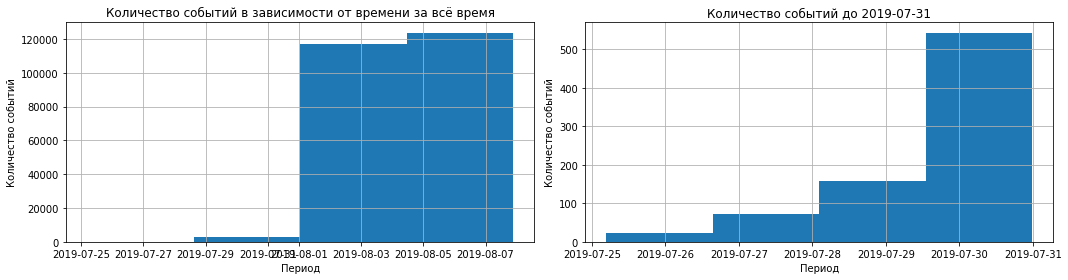

In [15]:
print('Минимальная дата', logs_exp['date'].min())
print('Максимальная дата', logs_exp['date'].max())

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Первый график
logs_exp['datetime'].hist(bins=4, ax=axes[0])
axes[0].set_title('Количество событий в зависимости от времени за всё время')
axes[0].set_xlabel('Период')
axes[0].set_ylabel('Количество событий')

# Второй график
logs_exp.loc[logs_exp['datetime'] < '2019-07-31']['datetime'].hist(bins=4, ax=axes[1])
axes[1].set_title('Количество событий до 2019-07-31')
axes[1].set_xlabel('Период')
axes[1].set_ylabel('Количество событий')

# Регулируем расположение графиков
plt.tight_layout()

# Отображаем графики
plt.show()

new_data = logs_exp.loc[logs_exp['datetime'] >= '2019-08-01']

Имеются данные за период с 25.07.2019 по 07.08.2019. Данные не одинаково полные за весь период. Они становятся полными с 01.08.2019. Но заканчиваются они также 07.08.2019.

Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [16]:
# Исходный датасет
total_events = len(logs_exp)
total_users = logs_exp['device_id'].nunique()

# Фильтрация данных после 31 июля
recent_data = logs_exp.loc[logs_exp['date'] > '2019-07-31']

# Подсчет потерь
lost_events = total_events - len(recent_data)
lost_users = total_users - recent_data['device_id'].nunique()

# Расчет потерь в процентном виде
percentage_lost_events = (lost_events / total_events) * 100
percentage_lost_users = (lost_users / total_users) * 100

# Вывод результатов
print(f'Исходное количество событий: {total_events}')
print(f'Исходное количество пользователей: {total_users}\n')

print(f'Потеряно событий после фильтрации: {lost_events} ({percentage_lost_events:.2f}%)')
print(f'Потеряно пользователей после фильтрации: {lost_users} ({percentage_lost_users:.2f}%)')

Исходное количество событий: 243713
Исходное количество пользователей: 7551

Потеряно событий после фильтрации: 2826 (1.16%)
Потеряно пользователей после фильтрации: 17 (0.23%)


Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [17]:
new_data.groupby('numb_exp')['device_id'].nunique().sort_values(ascending=False)

numb_exp
248    2537
247    2513
246    2484
Name: device_id, dtype: int64

#### Шаг 4. Изучите воронку событий

Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [18]:
new_data['event_name'].value_counts().sort_values(ascending=False)

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [19]:
event_counts = new_data.groupby('event_name')['device_id'].nunique().to_dict()
event_counts

{'CartScreenAppear': 3734,
 'MainScreenAppear': 7419,
 'OffersScreenAppear': 4593,
 'PaymentScreenSuccessful': 3539,
 'Tutorial': 840}

In [20]:
event_counts['%'] = (new_data.groupby('event_name')['device_id'].nunique() / new_data['device_id'].nunique()).sort_values(ascending=False)
round(event_counts['%'] * 100, 1)

event_name
MainScreenAppear           98.5
OffersScreenAppear         61.0
CartScreenAppear           49.6
PaymentScreenSuccessful    47.0
Tutorial                   11.1
Name: device_id, dtype: float64

Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

События, скорее всего, не обязательно происходят в строгой последовательности. Например, возможно, пользователь может совершить покупку, даже не пройдя руководство (Tutorial). Возможно, некоторые пользователи пропускают этот шаг и переходят сразу к просмотру предложений (OffersScreenAppear) или добавлению товаров в корзину (CartScreenAppear). Следовательно, Tutorial не обязательно является предшественником всех остальных событий, и он может не иметь существенного влияния на успешное завершение покупки (PaymentScreenSuccessful).

1. MainScreenAppear - Появление главного экрана
2. OffersScreenAppear - Появляется экран предложений
3. CartScreenAppear - Появление экрана корзины
4. PaymentScreenSuccessful - Экран оплаты прошел успешно

По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [21]:
funnel_order = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

funnel_conversion = {}

for i in range(len(funnel_order) - 1):
    current_event = funnel_order[i]
    next_event = funnel_order[i + 1]

    conversion_rate = event_counts[next_event] / event_counts[current_event]
    funnel_conversion[f'{current_event} -> {next_event}'] = conversion_rate
    
for step, conversion_rate in funnel_conversion.items():
    print(f'{step}: {round(conversion_rate * 100, 2)}%')

MainScreenAppear -> OffersScreenAppear: 61.91%
OffersScreenAppear -> CartScreenAppear: 81.3%
CartScreenAppear -> PaymentScreenSuccessful: 94.78%


На каком шаге теряете больше всего пользователей?

Самая большая потеря пользователей происходит на этапе перехода с главного экрана на экран предложений.

Какая доля пользователей доходит от первого события до оплаты?

In [22]:
conversion_to_payment = event_counts['PaymentScreenSuccessful'] / event_counts['MainScreenAppear']
print(f"{round(conversion_to_payment * 100, 2)}% пользователей доходит от первого события до оплаты")

47.7% пользователей доходит от первого события до оплаты


На основе анализа воронки событий и конверсии между ними можно сделать следующие выводы:

1. **Главный экран (MainScreenAppear):** Большинство пользователей начинают с этого этапа, и его прохождение составляет 100% (базовый уровень).

2. **Экран предложений (OffersScreenAppear):** Почти 62% пользователей, просмотревших главный экран, переходят к просмотру предложений. Это самый крупный процент потери пользователей на этапе воронки.

3. **Экран корзины (CartScreenAppear):** Примерно 81% пользователей, увидевших предложения, переходят к добавлению товаров в корзину.

4. **Экран оплаты (PaymentScreenSuccessful):** Более 94% пользователей, добавивших товары в корзину, успешно завершают оплату.

Общая конверсия от первого события (MainScreenAppear) до оплаты (PaymentScreenSuccessful) составляет примерно 47.7%.

Следует отметить, что порядок событий не обязательно строгий, и некоторые пользователи могут пропускать определенные этапы, например, проходить мимо руководства (Tutorial) и сразу переходить к просмотру предложений или добавлению товаров в корзину.

Большая потеря пользователей происходит на этапе перехода с главного экрана на экран предложений, что может указывать на неоптимальность предложенных товаров или сложности в интерфейсе привлечения внимания пользователя. Оптимизация этого перехода может привести к улучшению общей конверсии в покупку.

#### Шаг 5. Изучите результаты эксперимента

Сколько пользователей в каждой экспериментальной группе?

In [23]:
new_data.groupby('numb_exp')['device_id'].nunique().sort_values(ascending=False)

numb_exp
248    2537
247    2513
246    2484
Name: device_id, dtype: int64

Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

Гипотезы

 - H0: Доли конверсии между группами 246 и 247 не различаются
 - H1: Доли конверсии между группами 246 и 247 различаются

Уровень статистической значимости 0.5

Используется Z-тест

In [24]:
# Уровень статистической значимости
alpha = 0.05

# Выделяем пользователей, прошедших события в каждой группе
group_246_main = new_data.loc[(new_data['numb_exp'] == '246') & (new_data['event_name'] == 'MainScreenAppear'), 'device_id'].nunique()
group_246_payment = new_data.loc[(new_data['numb_exp'] == '246') & (new_data['event_name'] == 'PaymentScreenSuccessful'), 'device_id'].nunique()

group_247_main = new_data.loc[(new_data['numb_exp'] == '247') & (new_data['event_name'] == 'MainScreenAppear'), 'device_id'].nunique()
group_247_payment = new_data.loc[(new_data['numb_exp'] == '247') & (new_data['event_name'] == 'PaymentScreenSuccessful'), 'device_id'].nunique()

# Рассчитываем доли
conversion_rate_246 = group_246_payment / group_246_main
conversion_rate_247 = group_247_payment / group_247_main

# Выборки
count = np.array([group_246_payment, group_247_payment])
nobs = np.array([group_246_main, group_247_main])

# Z-тест для разности долей
stat, p_value = proportions_ztest(count, nobs)

# Вывод результатов
print(f"Z-статистика: {stat}")
print(f"p-значение: {p_value}")

# Проверка гипотезы
if p_value < alpha:
    print("Различия между группами статистически значимы")
else:
    print("Различий между группами не выявлено")

Z-статистика: 1.5529168745114943
p-значение: 0.12044299485641764
Различий между группами не выявлено


Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

Гипотезы

 - H0: Доли пользователей, появившихся на том или ином этапе события, в группах 246 и 247 не различаются.
 - H1: Доли пользователей, появившихся на том или ином этапе события, в группах 246 и 247 различаются.

Уровень статистической значимости 0.5

Используется Z-тест

In [25]:
def compare_events(event_name):
    # Шаг 1: Выбераем самое популярное событие
    # Шаг 2: Считаем число пользователей, совершивших это событие в каждой из контрольных групп
    group_246_event = new_data.loc[(new_data['numb_exp'] == '246') & (new_data['event_name'] == event_name), 'device_id'].nunique()
    group_247_event = new_data.loc[(new_data['numb_exp'] == '247') & (new_data['event_name'] == event_name), 'device_id'].nunique()

    # Шаг 3: Считаем долю пользователей, совершивших это событие в каждой группе
    total_users_246 = new_data.loc[new_data['numb_exp'] == '246', 'device_id'].nunique()
    total_users_247 = new_data.loc[new_data['numb_exp'] == '247', 'device_id'].nunique()

    conversion_rate_246 = group_246_event / total_users_246
    conversion_rate_247 = group_247_event / total_users_247

    # Шаг 4: Проверяем, будет ли отличие между группами статистически достоверным
    count = np.array([group_246_event, group_247_event])
    nobs = np.array([total_users_246, total_users_247])
    
    # Z-тест для разности долей
    stat, p_value = proportions_ztest(count, nobs)

    print(f"Для события '{event_name}':")
    print(f"Число пользователей в группе 246: {group_246_event}")
    print(f"Число пользователей в группе 247: {group_247_event}")
    print(f"Доля пользователей в группе 246: {conversion_rate_246 * 100:.2f}%")
    print(f"Доля пользователей в группе 247: {conversion_rate_247 * 100:.2f}%")
    print(f"p-value: {p_value}")
    
    # Устанавливаем уровень статистической значимости
    alpha = 0.05
    if p_value < alpha:
        print("Различия между группами статистически значимы")
    else:
        print("Различий между группами не выявлено")
        
    print()

# Применяем функцию для каждого события
for event in funnel_order:
    compare_events(event)

Для события 'MainScreenAppear':
Число пользователей в группе 246: 2450
Число пользователей в группе 247: 2476
Доля пользователей в группе 246: 98.63%
Доля пользователей в группе 247: 98.53%
p-value: 0.7570597232046099
Различий между группами не выявлено

Для события 'OffersScreenAppear':
Число пользователей в группе 246: 1542
Число пользователей в группе 247: 1520
Доля пользователей в группе 246: 62.08%
Доля пользователей в группе 247: 60.49%
p-value: 0.2480954578522181
Различий между группами не выявлено

Для события 'CartScreenAppear':
Число пользователей в группе 246: 1266
Число пользователей в группе 247: 1238
Доля пользователей в группе 246: 50.97%
Доля пользователей в группе 247: 49.26%
p-value: 0.22883372237997213
Различий между группами не выявлено

Для события 'PaymentScreenSuccessful':
Число пользователей в группе 246: 1200
Число пользователей в группе 247: 1158
Доля пользователей в группе 246: 48.31%
Доля пользователей в группе 247: 46.08%
p-value: 0.11456679313141847
Различ

Можно сказать, что разбиение на группы работает корректно.

Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

Гипотеза для сравнения с каждой контрольной группой 246 или 247:

 - H0: Доли пользователей с изменённым шрифтом и контрольной группы 246 или 247 не различаются.
 - H1: Доли пользователей с изменённым шрифтом и контрольной группы 246 или 247 различаются.
 
Гипотеза для сравнения с объединённой контрольной группой:

 - H0: Доли пользователей с изменённым шрифтом и объединённой контрольной группой не различаются.
 - H1: Доли пользователей с изменённым шрифтом и объединённой контрольной группой различаются.

Уровень статистической значимости 0.5

Используется Z-тест

In [26]:
def compare_with_control(group_changed_font, control_group):
    for event in funnel_order:
        # Выделяем данные для каждого события в группе с изменённым шрифтом
        group_changed_font_event = group_changed_font.loc[group_changed_font['event_name'] == event, 'device_id'].nunique()

        # Выделяем данные для каждого события в контрольной группе
        control_group_event = new_data.loc[(new_data['numb_exp'] == control_group) & (new_data['event_name'] == event), 'device_id'].nunique()

        # Считаем долю пользователей, совершивших это событие, в каждой группе
        total_users_changed_font = group_changed_font['device_id'].nunique()
        total_users_control_group = new_data.loc[new_data['numb_exp'] == control_group, 'device_id'].nunique()

        # Добавляем проверку на ноль перед делением
        conversion_rate_changed_font = group_changed_font_event / total_users_changed_font
        conversion_rate_control_group = control_group_event / total_users_control_group

        # Проверяем, будет ли отличие между группами статистически достоверным
        count = np.array([group_changed_font_event, control_group_event])
        nobs = np.array([total_users_changed_font, total_users_control_group])

        stat, p_value = proportions_ztest(count, nobs)

        print(f"Для события '{event}':")
        print(f"Число пользователей в группе с изменённым шрифтом: {group_changed_font_event}")
        print(f"Число пользователей в контрольной группе {control_group}: {control_group_event}")
        print(f"Доля пользователей в группе с изменённым шрифтом: {conversion_rate_changed_font * 100:.2f}%")
        print(f"Доля пользователей в контрольной группе {control_group}: {conversion_rate_control_group * 100:.2f}%")
        print(f"p-value: {p_value}")
            
        # Уровень статистической значимости
        alpha = 0.05
        if p_value < alpha:
            print("Различия между группами статистически значимы")
        else:
            print("Различий между группами не выявлено")
            
        print()

group_changed_font = new_data.loc[new_data['numb_exp'] == '248']
        
# Сравниваем группу с изменённым шрифтом с каждой контрольной группой
compare_with_control(group_changed_font, '246')
compare_with_control(group_changed_font, '247')

Для события 'MainScreenAppear':
Число пользователей в группе с изменённым шрифтом: 2493
Число пользователей в контрольной группе 246: 2450
Доля пользователей в группе с изменённым шрифтом: 98.27%
Доля пользователей в контрольной группе 246: 98.63%
p-value: 0.2949721933554553
Различий между группами не выявлено

Для события 'OffersScreenAppear':
Число пользователей в группе с изменённым шрифтом: 1531
Число пользователей в контрольной группе 246: 1542
Доля пользователей в группе с изменённым шрифтом: 60.35%
Доля пользователей в контрольной группе 246: 62.08%
p-value: 0.20836205402738917
Различий между группами не выявлено

Для события 'CartScreenAppear':
Число пользователей в группе с изменённым шрифтом: 1230
Число пользователей в контрольной группе 246: 1266
Доля пользователей в группе с изменённым шрифтом: 48.48%
Доля пользователей в контрольной группе 246: 50.97%
p-value: 0.07842923237520125
Различий между группами не выявлено

Для события 'PaymentScreenSuccessful':
Число пользователе

In [27]:
# Добавим функцию для сравнения с объединенной контрольной группой
def compare_with_combined_control(group_changed_font, combined_control_group):
    for event in funnel_order:
        # Выделяем данные для каждого события в группе с изменённым шрифтом
        group_changed_font_event = group_changed_font.loc[group_changed_font['event_name'] == event, 'device_id'].nunique()

        # Выделяем данные для каждого события в объединенной контрольной группе
        combined_control_group_event = combined_control_group.loc[combined_control_group['event_name'] == event, 'device_id'].nunique()

        # Считаем долю пользователей, совершивших это событие, в каждой группе
        total_users_changed_font = group_changed_font['device_id'].nunique()
        total_users_combined_control_group = combined_control_group['device_id'].nunique()

        # Добавляем проверку на ноль перед делением
        conversion_rate_changed_font = group_changed_font_event / total_users_changed_font
        conversion_rate_combined_control_group = combined_control_group_event / total_users_combined_control_group

        # Проверяем, будет ли отличие между группами статистически достоверным
        count = np.array([group_changed_font_event, combined_control_group_event])
        nobs = np.array([total_users_changed_font, total_users_combined_control_group])

        stat, p_value = proportions_ztest(count, nobs)

        print(f"Для события '{event}':")
        print(f"Число пользователей в группе с изменённым шрифтом: {group_changed_font_event}")
        print(f"Число пользователей в объединенной контрольной группе: {combined_control_group_event}")
        print(f"Доля пользователей в группе с изменённым шрифтом: {conversion_rate_changed_font * 100:.2f}%")
        print(f"Доля пользователей в объединенной контрольной группе: {conversion_rate_combined_control_group * 100:.2f}%")
        print(f"p-value: {p_value}")

        # Уровень статистической значимости
        alpha = 0.05
        if p_value < alpha:
            print("Различия между группами статистически значимы")
        else:
            print("Различий между группами не выявлено")

        print()

# Объединяем данные по контрольным группам 246 и 247
combined_control_group = new_data.loc[new_data['numb_exp'].isin(['246', '247'])]

# Сравниваем группу с изменённым шрифтом с объединенной контрольной группой
compare_with_combined_control(group_changed_font, combined_control_group)

Для события 'MainScreenAppear':
Число пользователей в группе с изменённым шрифтом: 2493
Число пользователей в объединенной контрольной группе: 4926
Доля пользователей в группе с изменённым шрифтом: 98.27%
Доля пользователей в объединенной контрольной группе: 98.58%
p-value: 0.29424526837179577
Различий между группами не выявлено

Для события 'OffersScreenAppear':
Число пользователей в группе с изменённым шрифтом: 1531
Число пользователей в объединенной контрольной группе: 3062
Доля пользователей в группе с изменённым шрифтом: 60.35%
Доля пользователей в объединенной контрольной группе: 61.28%
p-value: 0.43425549655188245
Различий между группами не выявлено

Для события 'CartScreenAppear':
Число пользователей в группе с изменённым шрифтом: 1230
Число пользователей в объединенной контрольной группе: 2504
Доля пользователей в группе с изменённым шрифтом: 48.48%
Доля пользователей в объединенной контрольной группе: 50.11%
p-value: 0.18175875284404386
Различий между группами не выявлено

Дл

Для каждого из событий не было выявлено статистически значимых различий между группой с изменённым шрифтом и контрольными группами (246 и 247).

Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

При проверке статистических гипотез выше был выбран 0,5 уровень значимости. Было сделано 16 проверок статистических гипотез. Стоит применить 0,003125% уровень значимости.

Гипотезы:

 - H0: Доли пользователей, появившихся на том или ином этапе события, в группах 246 и 247 не различаются.
 - H1: Доли пользователей, появившихся на том или ином этапе события, в группах 246 и 247 различаются.

Уровень статистической значимости 0.003125

Используется Z-тест

In [28]:
def compare_events(event_name):
    # Шаг 1: Выбераем самое популярное событие
    # Шаг 2: Считаем число пользователей, совершивших это событие в каждой из контрольных групп
    group_246_event = new_data.loc[(new_data['numb_exp'] == '246') & (new_data['event_name'] == event_name), 'device_id'].nunique()
    group_247_event = new_data.loc[(new_data['numb_exp'] == '247') & (new_data['event_name'] == event_name), 'device_id'].nunique()

    # Шаг 3: Считаем долю пользователей, совершивших это событие в каждой группе
    total_users_246 = new_data.loc[new_data['numb_exp'] == '246', 'device_id'].nunique()
    total_users_247 = new_data.loc[new_data['numb_exp'] == '247', 'device_id'].nunique()

    conversion_rate_246 = group_246_event / total_users_246
    conversion_rate_247 = group_247_event / total_users_247

    # Шаг 4: Проверяем, будет ли отличие между группами статистически достоверным
    count = np.array([group_246_event, group_247_event])
    nobs = np.array([total_users_246, total_users_247])
    
    # Z-тест для разности долей
    stat, p_value = proportions_ztest(count, nobs)

    print(f"Для события '{event_name}':")
    print(f"Число пользователей в группе 246: {group_246_event}")
    print(f"Число пользователей в группе 247: {group_247_event}")
    print(f"Доля пользователей в группе 246: {conversion_rate_246 * 100:.2f}%")
    print(f"Доля пользователей в группе 247: {conversion_rate_247 * 100:.2f}%")
    print(f"p-value: {p_value}")
    
    # Устанавливаем уровень статистической значимости
    alpha = 0.003125
    if p_value < alpha:
        print("Различия между группами статистически значимы")
    else:
        print("Различий между группами не выявлено")
        
    print()

# Применяем функцию для каждого события
for event in funnel_order:
    compare_events(event)

Для события 'MainScreenAppear':
Число пользователей в группе 246: 2450
Число пользователей в группе 247: 2476
Доля пользователей в группе 246: 98.63%
Доля пользователей в группе 247: 98.53%
p-value: 0.7570597232046099
Различий между группами не выявлено

Для события 'OffersScreenAppear':
Число пользователей в группе 246: 1542
Число пользователей в группе 247: 1520
Доля пользователей в группе 246: 62.08%
Доля пользователей в группе 247: 60.49%
p-value: 0.2480954578522181
Различий между группами не выявлено

Для события 'CartScreenAppear':
Число пользователей в группе 246: 1266
Число пользователей в группе 247: 1238
Доля пользователей в группе 246: 50.97%
Доля пользователей в группе 247: 49.26%
p-value: 0.22883372237997213
Различий между группами не выявлено

Для события 'PaymentScreenSuccessful':
Число пользователей в группе 246: 1200
Число пользователей в группе 247: 1158
Доля пользователей в группе 246: 48.31%
Доля пользователей в группе 247: 46.08%
p-value: 0.11456679313141847
Различ

Гипотеза для сравнения с каждой контрольной группой 246 или 247:

 - H0: Доли пользователей с изменённым шрифтом и контрольной группы 246 или 247 не различаются.
 - H1: Доли пользователей с изменённым шрифтом и контрольной группы 246 или 247 различаются.
 
Гипотеза для сравнения с объединённой контрольной группой:

 - H0: Доли пользователей с изменённым шрифтом и объединённой контрольной группой не различаются.
 - H1: Доли пользователей с изменённым шрифтом и объединённой контрольной группой различаются.

Уровень статистической значимости 0.003125

Используется Z-тест

In [29]:
def compare_with_control(group_changed_font, control_group):
    for event in funnel_order:
        # Выделяем данные для каждого события в группе с изменённым шрифтом
        group_changed_font_event = group_changed_font.loc[group_changed_font['event_name'] == event, 'device_id'].nunique()

        # Выделяем данные для каждого события в контрольной группе
        control_group_event = new_data.loc[(new_data['numb_exp'] == control_group) & (new_data['event_name'] == event), 'device_id'].nunique()

        # Считаем долю пользователей, совершивших это событие, в каждой группе
        total_users_changed_font = group_changed_font['device_id'].nunique()
        total_users_control_group = new_data.loc[new_data['numb_exp'] == control_group, 'device_id'].nunique()

        # Добавляем проверку на ноль перед делением
        conversion_rate_changed_font = group_changed_font_event / total_users_changed_font
        conversion_rate_control_group = control_group_event / total_users_control_group

        # Проверяем, будет ли отличие между группами статистически достоверным
        count = np.array([group_changed_font_event, control_group_event])
        nobs = np.array([total_users_changed_font, total_users_control_group])

        stat, p_value = proportions_ztest(count, nobs)

        print(f"Для события '{event}':")
        print(f"Число пользователей в группе с изменённым шрифтом: {group_changed_font_event}")
        print(f"Число пользователей в контрольной группе {control_group}: {control_group_event}")
        print(f"Доля пользователей в группе с изменённым шрифтом: {conversion_rate_changed_font * 100:.2f}%")
        print(f"Доля пользователей в контрольной группе {control_group}: {conversion_rate_control_group * 100:.2f}%")
        print(f"p-value: {p_value}")
            
        # Уровень статистической значимости
        alpha = 0.003125
        if p_value < alpha:
            print("Различия между группами статистически значимы")
        else:
            print("Различий между группами не выявлено")
            
        print()

group_changed_font = new_data.loc[new_data['numb_exp'] == '248']
        
# Сравниваем группу с изменённым шрифтом с каждой контрольной группой
compare_with_control(group_changed_font, '246')
compare_with_control(group_changed_font, '247')

Для события 'MainScreenAppear':
Число пользователей в группе с изменённым шрифтом: 2493
Число пользователей в контрольной группе 246: 2450
Доля пользователей в группе с изменённым шрифтом: 98.27%
Доля пользователей в контрольной группе 246: 98.63%
p-value: 0.2949721933554553
Различий между группами не выявлено

Для события 'OffersScreenAppear':
Число пользователей в группе с изменённым шрифтом: 1531
Число пользователей в контрольной группе 246: 1542
Доля пользователей в группе с изменённым шрифтом: 60.35%
Доля пользователей в контрольной группе 246: 62.08%
p-value: 0.20836205402738917
Различий между группами не выявлено

Для события 'CartScreenAppear':
Число пользователей в группе с изменённым шрифтом: 1230
Число пользователей в контрольной группе 246: 1266
Доля пользователей в группе с изменённым шрифтом: 48.48%
Доля пользователей в контрольной группе 246: 50.97%
p-value: 0.07842923237520125
Различий между группами не выявлено

Для события 'PaymentScreenSuccessful':
Число пользователе

In [30]:
# Добавим функцию для сравнения с объединенной контрольной группой
def compare_with_combined_control(group_changed_font, combined_control_group):
    for event in funnel_order:
        # Выделяем данные для каждого события в группе с изменённым шрифтом
        group_changed_font_event = group_changed_font.loc[group_changed_font['event_name'] == event, 'device_id'].nunique()

        # Выделяем данные для каждого события в объединенной контрольной группе
        combined_control_group_event = combined_control_group.loc[combined_control_group['event_name'] == event, 'device_id'].nunique()

        # Считаем долю пользователей, совершивших это событие, в каждой группе
        total_users_changed_font = group_changed_font['device_id'].nunique()
        total_users_combined_control_group = combined_control_group['device_id'].nunique()

        # Добавляем проверку на ноль перед делением
        conversion_rate_changed_font = group_changed_font_event / total_users_changed_font
        conversion_rate_combined_control_group = combined_control_group_event / total_users_combined_control_group

        # Проверяем, будет ли отличие между группами статистически достоверным
        count = np.array([group_changed_font_event, combined_control_group_event])
        nobs = np.array([total_users_changed_font, total_users_combined_control_group])

        stat, p_value = proportions_ztest(count, nobs)

        print(f"Для события '{event}':")
        print(f"Число пользователей в группе с изменённым шрифтом: {group_changed_font_event}")
        print(f"Число пользователей в объединенной контрольной группе: {combined_control_group_event}")
        print(f"Доля пользователей в группе с изменённым шрифтом: {conversion_rate_changed_font * 100:.2f}%")
        print(f"Доля пользователей в объединенной контрольной группе: {conversion_rate_combined_control_group * 100:.2f}%")
        print(f"p-value: {p_value}")

        # Уровень статистической значимости
        alpha = 0.003125
        if p_value < alpha:
            print("Различия между группами статистически значимы")
        else:
            print("Различий между группами не выявлено")

        print()

# Объединяем данные по контрольным группам 246 и 247
combined_control_group = new_data.loc[new_data['numb_exp'].isin(['246', '247'])]

# Сравниваем группу с изменённым шрифтом с объединенной контрольной группой
compare_with_combined_control(group_changed_font, combined_control_group)

Для события 'MainScreenAppear':
Число пользователей в группе с изменённым шрифтом: 2493
Число пользователей в объединенной контрольной группе: 4926
Доля пользователей в группе с изменённым шрифтом: 98.27%
Доля пользователей в объединенной контрольной группе: 98.58%
p-value: 0.29424526837179577
Различий между группами не выявлено

Для события 'OffersScreenAppear':
Число пользователей в группе с изменённым шрифтом: 1531
Число пользователей в объединенной контрольной группе: 3062
Доля пользователей в группе с изменённым шрифтом: 60.35%
Доля пользователей в объединенной контрольной группе: 61.28%
p-value: 0.43425549655188245
Различий между группами не выявлено

Для события 'CartScreenAppear':
Число пользователей в группе с изменённым шрифтом: 1230
Число пользователей в объединенной контрольной группе: 2504
Доля пользователей в группе с изменённым шрифтом: 48.48%
Доля пользователей в объединенной контрольной группе: 50.11%
p-value: 0.18175875284404386
Различий между группами не выявлено

Дл

## Общий вывод

На **начальном этапе** исследования имелся датафрейм с 244 126 строк. Были заменены названия столбцов на более удобные. Заменены типы данных в некоторых столбцах на корректные. Пропусков не было. Но были дубликаты. Они были удалены. Был добавлен отдельный столбец с датами.

**На этапе изучения и проверки данные было выяснено что**:

1. В логе 243713 событий.
2. В логе 7551 пользователей.
3. В среднем на пользователя приходятся 32 события.
4. Период в логе длится с 25.07.2019 по 07.08.2019.
5. Данные не одинаково полные за весь период. Они становятся полными с 01.08.2019. Но заканчиваются они также 07.08.2019.
6. Отбросив старые данные, было потеряно 2826 (1.16%) событий и 17 (0.23%) пользователей.
7. Проверка подтвердила, что у вас есть пользователи из всех трёх экспериментальных групп.

**На основе анализа воронки событий и конверсии между ними можно сделать следующие выводы**:

1. Как часто встречается то или иное событие:

 - MainScreenAppear - 117 328
 - OffersScreenAppear - 46 333
 - CartScreenAppear - 42 303
 - PaymentScreenSuccessful - 33 918
 - Tutorial - 1 005
 
 
2. Сколько пользователей совершали каждое из этих событий.

 - CartScreenAppear - 3 734
 - MainScreenAppear - 7 419
 - OffersScreenAppear - 4 593
 - PaymentScreenSuccessful - 3 539
 - Tutorial - 840
 
 
3. Доля пользователей, которые хоть раз совершали событие.

 - MainScreenAppear - 98.5
 - OffersScreenAppear - 61.0
 - CartScreenAppear - 49.6
 - PaymentScreenSuccessful - 47.0
 - Tutorial - 11.1
 
 
4. События, скорее всего, не обязательно происходят в строгой последовательности. Например, возможно, пользователь может совершить покупку, даже не пройдя руководство (Tutorial). Возможно, некоторые пользователи пропускают этот шаг и переходят сразу к просмотру предложений (OffersScreenAppear) или добавлению товаров в корзину (CartScreenAppear). Следовательно, Tutorial не обязательно является предшественником всех остальных событий, и он может не иметь существенного влияния на успешное завершение покупки (PaymentScreenSuccessful).

 - MainScreenAppear - Появление главного экрана
 - OffersScreenAppear - Появляется экран предложений
 - CartScreenAppear - Появление экрана корзины
 - PaymentScreenSuccessful - Экран оплаты прошел успешно

5. Доля пользователей, которые проходят на следующий шаг воронки (от числа пользователей на предыдущем).

MainScreenAppear -> OffersScreenAppear: 61.91%
OffersScreenAppear -> CartScreenAppear: 81.3%
CartScreenAppear -> PaymentScreenSuccessful: 94.78%

6. Самая большая потеря пользователей происходит на этапе перехода с главного экрана на экран предложений.
7. 47.7% пользователей доходит от первого события до оплаты

**Результаты эксперимента**

1. В следствии А/А-эксперимента, различий между контрольными группами не 246 и 247 выявлено
2. Разбиение на группы работает корректно. Различий между группами не выявлено.
3. Для каждого из событий не было выявлено статистически значимых различий между группой с изменённым шрифтом и контрольными группами (246 и 247).
4. При проверке статистических гипотез выше был выбран 0,5 уровень значимости. Было сделано 16 проверок статистических гипотез. При 0.003125% уровне значимости, результаты те же.

**Итог**: Изменение шрифта на поведение пользователей не влияет.